---
# **HD PROJECT: End-to-end project delivery on cyber-security data analytics**

**Experiments on two datasets- Dataset1: NSL-KDD and Dataset 2: Processed Combined IoT dataset**


# **DATASET 1: NSL-KDD** 

# SECTION 1: DECLARE THE MODULES

In [1]:
import os
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')




# SECTION 2: Data import and preprocess

In [1]:
%pip install wget
import wget
    
link_to_data = 'https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/training_attack_types.txt?raw=true'
DataSet = wget.download(link_to_data) 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
DataSet

'training_attack_types.txt'

In [4]:
header_names = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack_type', 'success_pred']


# Differentiating between nominal, binary, and numeric features

# root_shell is marked as a continuous feature in the kddcup.names 
# file, but it is supposed to be a binary feature according to the 
# dataset documentation

# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

col_names = np.array(header_names)

nominal_idx = [1, 2, 3]
binary_idx = [6, 11, 13, 14, 20, 21]
numeric_idx = list(set(range(41)).difference(nominal_idx).difference(binary_idx))

nominal_cols = col_names[nominal_idx].tolist()
binary_cols = col_names[binary_idx].tolist()
numeric_cols = col_names[numeric_idx].tolist()

In [5]:
# training_attack_types.txt maps each of the 22 different attacks to 1 of 4 categories
# file obtained from http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types

category = defaultdict(list)
category['benign'].append('normal')

with open(DataSet, 'r') as f:
    for line in f.readlines():
        attack, cat = line.strip().split(' ')
        category[cat].append(attack)

attack_mapping = dict((v,k) for k in category for v in category[k])

In [6]:
attack_mapping

{'normal': 'benign',
 'apache2': 'dos',
 'back': 'dos',
 'mailbomb': 'dos',
 'processtable': 'dos',
 'snmpgetattack': 'dos',
 'teardrop': 'dos',
 'smurf': 'dos',
 'land': 'dos',
 'neptune': 'dos',
 'pod': 'dos',
 'udpstorm': 'dos',
 'ps': 'u2r',
 'buffer_overflow': 'u2r',
 'perl': 'u2r',
 'rootkit': 'u2r',
 'loadmodule': 'u2r',
 'xterm': 'u2r',
 'sqlattack': 'u2r',
 'httptunnel': 'u2r',
 'ftp_write': 'r2l',
 'guess_passwd': 'r2l',
 'snmpguess': 'r2l',
 'imap': 'r2l',
 'spy': 'r2l',
 'warezclient': 'r2l',
 'warezmaster': 'r2l',
 'multihop': 'r2l',
 'phf': 'r2l',
 'named': 'r2l',
 'sendmail': 'r2l',
 'xlock': 'r2l',
 'xsnoop': 'r2l',
 'worm': 'probe',
 'nmap': 'probe',
 'ipsweep': 'probe',
 'portsweep': 'probe',
 'satan': 'probe',
 'mscan': 'probe',
 'saint': 'probe'}

In [7]:
#Processing Training Data

train_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTrain%2B.txt'



train_df = pd.read_csv(train_file, names=header_names)

train_df['attack_category'] = train_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])

train_df.drop(['success_pred'], axis=1, inplace=True)






In [8]:
#Processing test Data
test_file='https://raw.githubusercontent.com/SIT719/2020-S2/master/data/Week_5_NSL-KDD-Dataset/KDDTest%2B.txt'

test_df = pd.read_csv(test_file, names=header_names)
test_df['attack_category'] = test_df['attack_type'] \
                                .map(lambda x: attack_mapping[x])
test_df.drop(['success_pred'], axis=1, inplace=True)

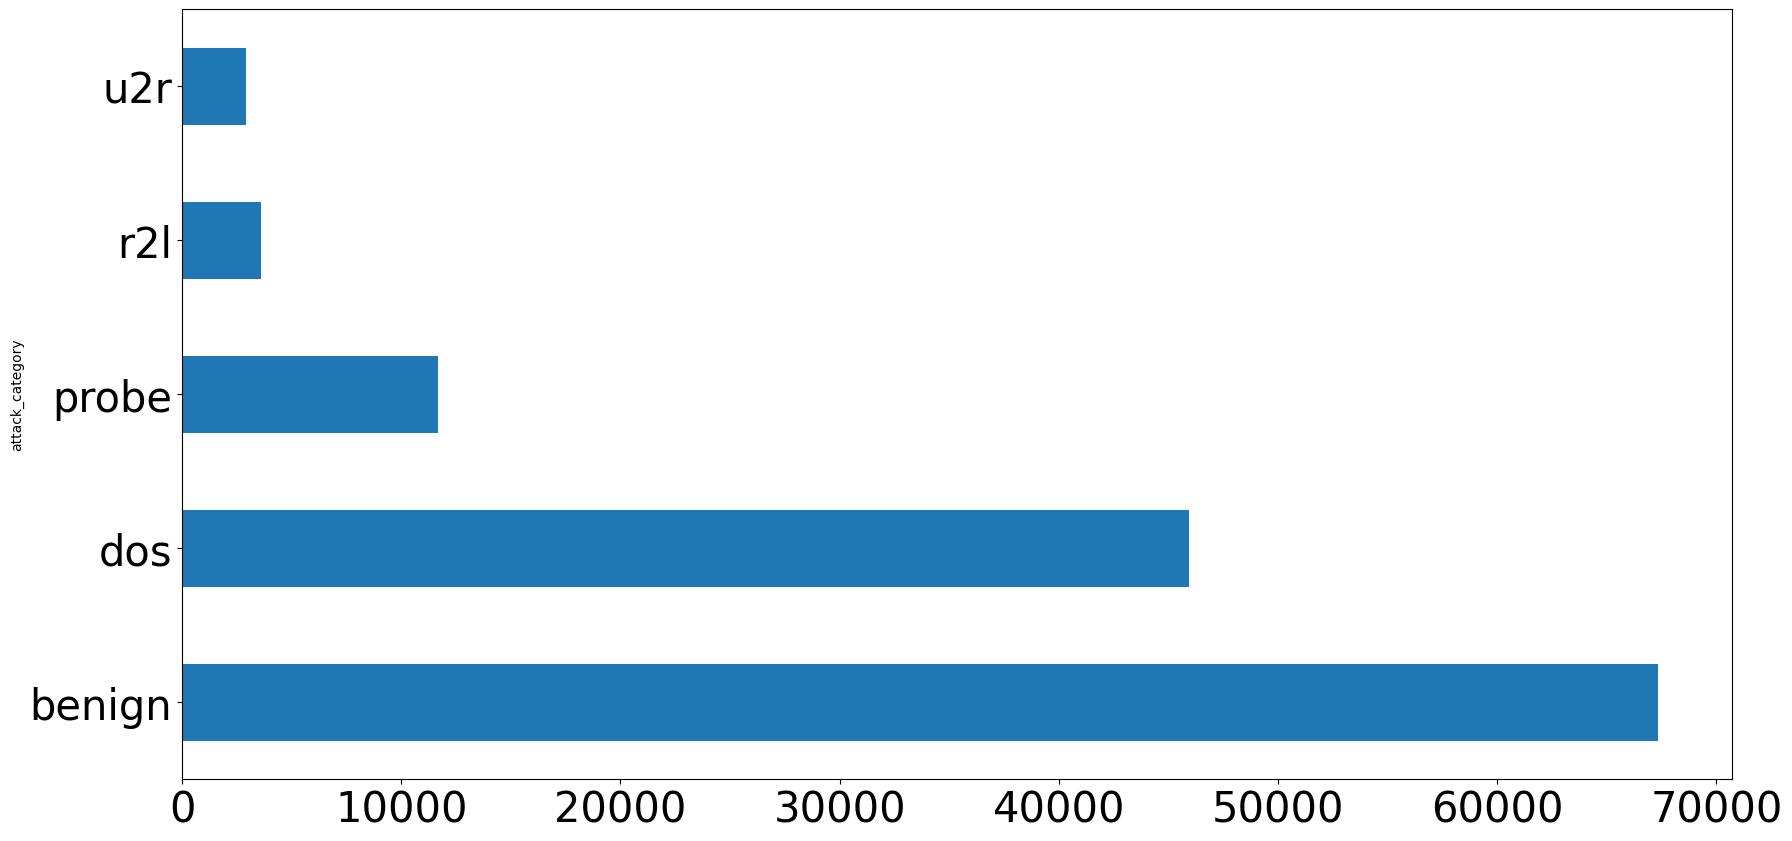

In [9]:
train_attack_types = train_df['attack_type'].value_counts()
train_attack_cats = train_df['attack_category'].value_counts()

test_attack_types = test_df['attack_type'].value_counts()
test_attack_cats = test_df['attack_category'].value_counts()

train_attack_types.plot(kind='barh', figsize=(20,10), fontsize=20)

train_attack_cats.plot(kind='barh', figsize=(20,10), fontsize=30)

train_df[binary_cols].describe().transpose()
train_df.groupby(['su_attempted']).size()
train_df['su_attempted'].replace(2, 0, inplace=True)
test_df['su_attempted'].replace(2, 0, inplace=True)
train_df.groupby(['su_attempted']).size()
train_df.groupby(['num_outbound_cmds']).size()

#Now, that's not a very useful feature - let's drop it from the dataset

train_df.drop('num_outbound_cmds', axis = 1, inplace=True)
test_df.drop('num_outbound_cmds', axis = 1, inplace=True)
numeric_cols.remove('num_outbound_cmds')



#Data Preparation

train_Y = train_df['attack_category']
train_x_raw = train_df.drop(['attack_category','attack_type'], axis=1)
test_Y = test_df['attack_category']
test_x_raw = test_df.drop(['attack_category','attack_type'], axis=1)


combined_df_raw = pd.concat([train_x_raw, test_x_raw])
combined_df = pd.get_dummies(combined_df_raw, columns=nominal_cols, drop_first=True)

train_x = combined_df[:len(train_x_raw)]
test_x = combined_df[len(train_x_raw):]

# Store dummy variable feature names
dummy_variables = list(set(train_x)-set(combined_df_raw))

#execute the commands in console
train_x.describe()
train_x['duration'].describe()
# Experimenting with StandardScaler on the single 'duration' feature
from sklearn.preprocessing import StandardScaler

durations = train_x['duration'].values.reshape(-1, 1)
standard_scaler = StandardScaler().fit(durations)
scaled_durations = standard_scaler.transform(durations)
pd.Series(scaled_durations.flatten()).describe()

# Experimenting with MinMaxScaler on the single 'duration' feature
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(durations)
min_max_scaled_durations = min_max_scaler.transform(durations)
pd.Series(min_max_scaled_durations.flatten()).describe()

# Experimenting with RobustScaler on the single 'duration' feature
from sklearn.preprocessing import RobustScaler

min_max_scaler = RobustScaler().fit(durations)
robust_scaled_durations = min_max_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Experimenting with MaxAbsScaler on the single 'duration' feature
from sklearn.preprocessing import MaxAbsScaler

max_Abs_scaler = MaxAbsScaler().fit(durations)
robust_scaled_durations = max_Abs_scaler.transform(durations)
pd.Series(robust_scaled_durations.flatten()).describe()

# Let's proceed with StandardScaler- Apply to all the numeric columns

standard_scaler = StandardScaler().fit(train_x[numeric_cols])

train_x[numeric_cols] = \
    standard_scaler.transform(train_x[numeric_cols])

test_x[numeric_cols] = \
    standard_scaler.transform(test_x[numeric_cols])
    
train_x.describe()



train_Y_bin = train_Y.apply(lambda x: 0 if x is 'benign' else 1)
test_Y_bin = test_Y.apply(lambda x: 0 if x is 'benign' else 1)


# SECTION 3: Multi class classification
#This is the section where you have to add other algorithms, tune algorithms and visualize to compare and analyze algorithms

In [10]:
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(train_x, train_Y)

pred_y = classifier.predict(test_x)

results = confusion_matrix(test_Y, pred_y)
error = zero_one_loss(test_Y, pred_y)

print(results)
print(error)


[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]
0.2378903477643719


In [11]:
# Import additional required libraries for the classification algorithms
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns


In [12]:
# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred, labels):
    """
    Calculate performance metrics including Precision, Recall, F-Score, and False Positive Rate
    """
    metrics = {}
    
    # Overall accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate metrics for each class
    precision = precision_score(y_true, y_pred, average=None, labels=labels, zero_division=0)
    recall = recall_score(y_true, y_pred, average=None, labels=labels, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=None, labels=labels, zero_division=0)
    
    # Calculate macro averages
    precision_macro = precision_score(y_true, y_pred, average='macro', zero_division=0)
    recall_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
    f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)
    
    # Calculate False Positive Rate for each class
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    fpr = []
    for i in range(len(labels)):
        tn = np.sum(cm) - (np.sum(cm[i, :]) + np.sum(cm[:, i]) - cm[i, i])
        fp = np.sum(cm[:, i]) - cm[i, i]
        fpr.append(fp / (fp + tn) if (fp + tn) > 0 else 0)
    
    metrics = {
        'accuracy': accuracy * 100,
        'precision_macro': precision_macro * 100,
        'recall_macro': recall_macro * 100,
        'f1_macro': f1_macro * 100,
        'fpr_macro': np.mean(fpr) * 100,
        'precision_per_class': precision * 100,
        'recall_per_class': recall * 100,
        'f1_per_class': f1 * 100,
        'fpr_per_class': np.array(fpr) * 100
    }
    
    return metrics, cm


In [13]:
# Get unique class labels for consistent ordering
class_labels = sorted(train_Y.unique())
print("Class labels:", class_labels)

# Store results for all algorithms
results_dict = {}
confusion_matrices = {}


Class labels: ['benign', 'dos', 'probe', 'r2l', 'u2r']


In [14]:
# 1. RANDOM FOREST CLASSIFIER
print("=" * 50)
print("RANDOM FOREST CLASSIFIER")
print("=" * 50)

# Parameter tuning for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=17)
rf_grid_search = GridSearchCV(rf_classifier, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(train_x, train_Y)

print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_:.4f}")

# Train with best parameters
rf_best = rf_grid_search.best_estimator_
rf_pred = rf_best.predict(test_x)

# Calculate metrics
rf_metrics, rf_cm = calculate_metrics(test_Y, rf_pred, class_labels)
results_dict['Random Forest'] = rf_metrics
confusion_matrices['Random Forest'] = rf_cm

print(f"Test Accuracy: {rf_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {rf_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {rf_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {rf_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {rf_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(rf_cm)


RANDOM FOREST CLASSIFIER
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation score: 0.9988
Test Accuracy: 75.28%
Macro Precision: 77.89%
Macro Recall: 47.90%
Macro F1-Score: 48.34%
Macro False Positive Rate: 8.46%

Confusion Matrix:
[[9456   67  187    0    1]
 [1538 5990  108    0    0]
 [ 811  164 1448    0    0]
 [2496    0    2   75    1]
 [ 194    0    0    4    2]]


In [15]:
# 2. K-NEAREST NEIGHBORS CLASSIFIER
print("\n" + "=" * 50)
print("K-NEAREST NEIGHBORS CLASSIFIER")
print("=" * 50)

# Parameter tuning for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_classifier = KNeighborsClassifier()
knn_grid_search = GridSearchCV(knn_classifier, knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
knn_grid_search.fit(train_x, train_Y)

print(f"Best parameters: {knn_grid_search.best_params_}")
print(f"Best cross-validation score: {knn_grid_search.best_score_:.4f}")

# Train with best parameters
knn_best = knn_grid_search.best_estimator_
knn_pred = knn_best.predict(test_x)

# Calculate metrics
knn_metrics, knn_cm = calculate_metrics(test_Y, knn_pred, class_labels)
results_dict['KNN'] = knn_metrics
confusion_matrices['KNN'] = knn_cm

print(f"Test Accuracy: {knn_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {knn_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {knn_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {knn_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {knn_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(knn_cm)



K-NEAREST NEIGHBORS CLASSIFIER
Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation score: 0.9972
Test Accuracy: 76.42%
Macro Precision: 84.90%
Macro Recall: 50.72%
Macro F1-Score: 52.53%
Macro False Positive Rate: 8.08%

Confusion Matrix:
[[9435   56  218    2    0]
 [1548 6061   27    0    0]
 [ 688  167 1568    0    0]
 [2413    2    5  151    3]
 [ 169    0   12    6   13]]


In [16]:
# 3. LOGISTIC REGRESSION CLASSIFIER
print("\n" + "=" * 50)
print("LOGISTIC REGRESSION CLASSIFIER")
print("=" * 50)

# Parameter tuning for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [1000, 2000]
}

lr_classifier = LogisticRegression(random_state=17, multi_class='ovr')
lr_grid_search = GridSearchCV(lr_classifier, lr_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(train_x, train_Y)

print(f"Best parameters: {lr_grid_search.best_params_}")
print(f"Best cross-validation score: {lr_grid_search.best_score_:.4f}")

# Train with best parameters
lr_best = lr_grid_search.best_estimator_
lr_pred = lr_best.predict(test_x)

# Calculate metrics
lr_metrics, lr_cm = calculate_metrics(test_Y, lr_pred, class_labels)
results_dict['Logistic Regression'] = lr_metrics
confusion_matrices['Logistic Regression'] = lr_cm

print(f"Test Accuracy: {lr_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {lr_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {lr_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {lr_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {lr_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(lr_cm)



LOGISTIC REGRESSION CLASSIFIER


/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib

Best parameters: {'C': 100, 'max_iter': 1000, 'solver': 'liblinear'}
Best cross-validation score: 0.9848
Test Accuracy: 72.57%
Macro Precision: 73.28%
Macro Recall: 48.53%
Macro F1-Score: 50.36%
Macro False Positive Rate: 9.30%

Confusion Matrix:
[[9025  430  253    0    3]
 [1944 5683    9    0    0]
 [ 664  129 1531   99    0]
 [2464    1    1  106    2]
 [ 177    1    2    4   16]]


In [17]:
# 4. SUPPORT VECTOR MACHINE CLASSIFIER
print("\n" + "=" * 50)
print("SUPPORT VECTOR MACHINE CLASSIFIER")
print("=" * 50)

# Parameter tuning for SVM (using smaller parameter grid due to computational complexity)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_classifier = SVC(random_state=17)
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
svm_grid_search.fit(train_x, train_Y)

print(f"Best parameters: {svm_grid_search.best_params_}")
print(f"Best cross-validation score: {svm_grid_search.best_score_:.4f}")

# Train with best parameters
svm_best = svm_grid_search.best_estimator_
svm_pred = svm_best.predict(test_x)

# Calculate metrics
svm_metrics, svm_cm = calculate_metrics(test_Y, svm_pred, class_labels)
results_dict['SVM'] = svm_metrics
confusion_matrices['SVM'] = svm_cm

print(f"Test Accuracy: {svm_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {svm_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {svm_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {svm_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {svm_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(svm_cm)



SUPPORT VECTOR MACHINE CLASSIFIER
Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score: 0.9961
Test Accuracy: 76.93%
Macro Precision: 84.31%
Macro Recall: 50.56%
Macro F1-Score: 52.90%
Macro False Positive Rate: 7.90%

Confusion Matrix:
[[9430   57  221    2    1]
 [1387 6205   44    0    0]
 [ 811  173 1439    0    0]
 [2307    0    7  258    2]
 [ 184    0    1    5   10]]


In [18]:
# 5. ADABOOST CLASSIFIER
print("\n" + "=" * 50)
print("ADABOOST CLASSIFIER")
print("=" * 50)

# Parameter tuning for AdaBoost
ada_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

ada_classifier = AdaBoostClassifier(random_state=17)
ada_grid_search = GridSearchCV(ada_classifier, ada_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
ada_grid_search.fit(train_x, train_Y)

print(f"Best parameters: {ada_grid_search.best_params_}")
print(f"Best cross-validation score: {ada_grid_search.best_score_:.4f}")

# Train with best parameters
ada_best = ada_grid_search.best_estimator_
ada_pred = ada_best.predict(test_x)

# Calculate metrics
ada_metrics, ada_cm = calculate_metrics(test_Y, ada_pred, class_labels)
results_dict['AdaBoost'] = ada_metrics
confusion_matrices['AdaBoost'] = ada_cm

print(f"Test Accuracy: {ada_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {ada_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {ada_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {ada_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {ada_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(ada_cm)



ADABOOST CLASSIFIER


/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(
/Users/sophiengo1811/Library/Python/3.9/

Best parameters: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 50}
Best cross-validation score: 0.9715
Test Accuracy: 73.50%
Macro Precision: 65.59%
Macro Recall: 47.68%
Macro F1-Score: 47.41%
Macro False Positive Rate: 8.84%

Confusion Matrix:
[[9419   81  210    1    0]
 [1745 5442  449    0    0]
 [ 618  249 1556    0    0]
 [2381    0   40  153    0]
 [ 188    3    9    0    0]]


In [ ]:
# 6. DECISION TREE CLASSIFIER (It has already implemented - adding to the comparison)
print("\n" + "=" * 50)
print("DECISION TREE CLASSIFIER (REFERENCE)")
print("=" * 50)

# Use the existing Decision Tree results
dt_pred = classifier.predict(test_x)
dt_metrics, dt_cm = calculate_metrics(test_Y, dt_pred, class_labels)
results_dict['Decision Tree'] = dt_metrics
confusion_matrices['Decision Tree'] = dt_cm

print(f"Test Accuracy: {dt_metrics['accuracy']:.2f}%")
print(f"Macro Precision: {dt_metrics['precision_macro']:.2f}%")
print(f"Macro Recall: {dt_metrics['recall_macro']:.2f}%")
print(f"Macro F1-Score: {dt_metrics['f1_macro']:.2f}%")
print(f"Macro False Positive Rate: {dt_metrics['fpr_macro']:.2f}%")
print("\nConfusion Matrix:")
print(dt_cm)



DECISION TREE CLASSIFIER (REFERENCE)
Test Accuracy: 76.21%
Macro Precision: 83.63%
Macro Recall: 51.25%
Macro F1-Score: 53.66%
Macro False Positive Rate: 8.06%

Confusion Matrix:
[[9365   56  289    1    0]
 [1541 5998   97    0    0]
 [ 677  220 1526    0    0]
 [2278    1   14  277    4]
 [ 175    0    5    5   15]]



PERFORMANCE COMPARISON SUMMARY
          Algorithm  Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  False Positive Rate (%)
                SVM         76.93          84.31       50.56         52.90                     7.90
                KNN         76.42          84.90       50.72         52.53                     8.08
      Decision Tree         76.21          83.63       51.25         53.66                     8.06
      Random Forest         75.28          77.89       47.90         48.34                     8.46
           AdaBoost         73.50          65.59       47.68         47.41                     8.84
Logistic Regression         72.57          73.28       48.53         50.36                     9.30


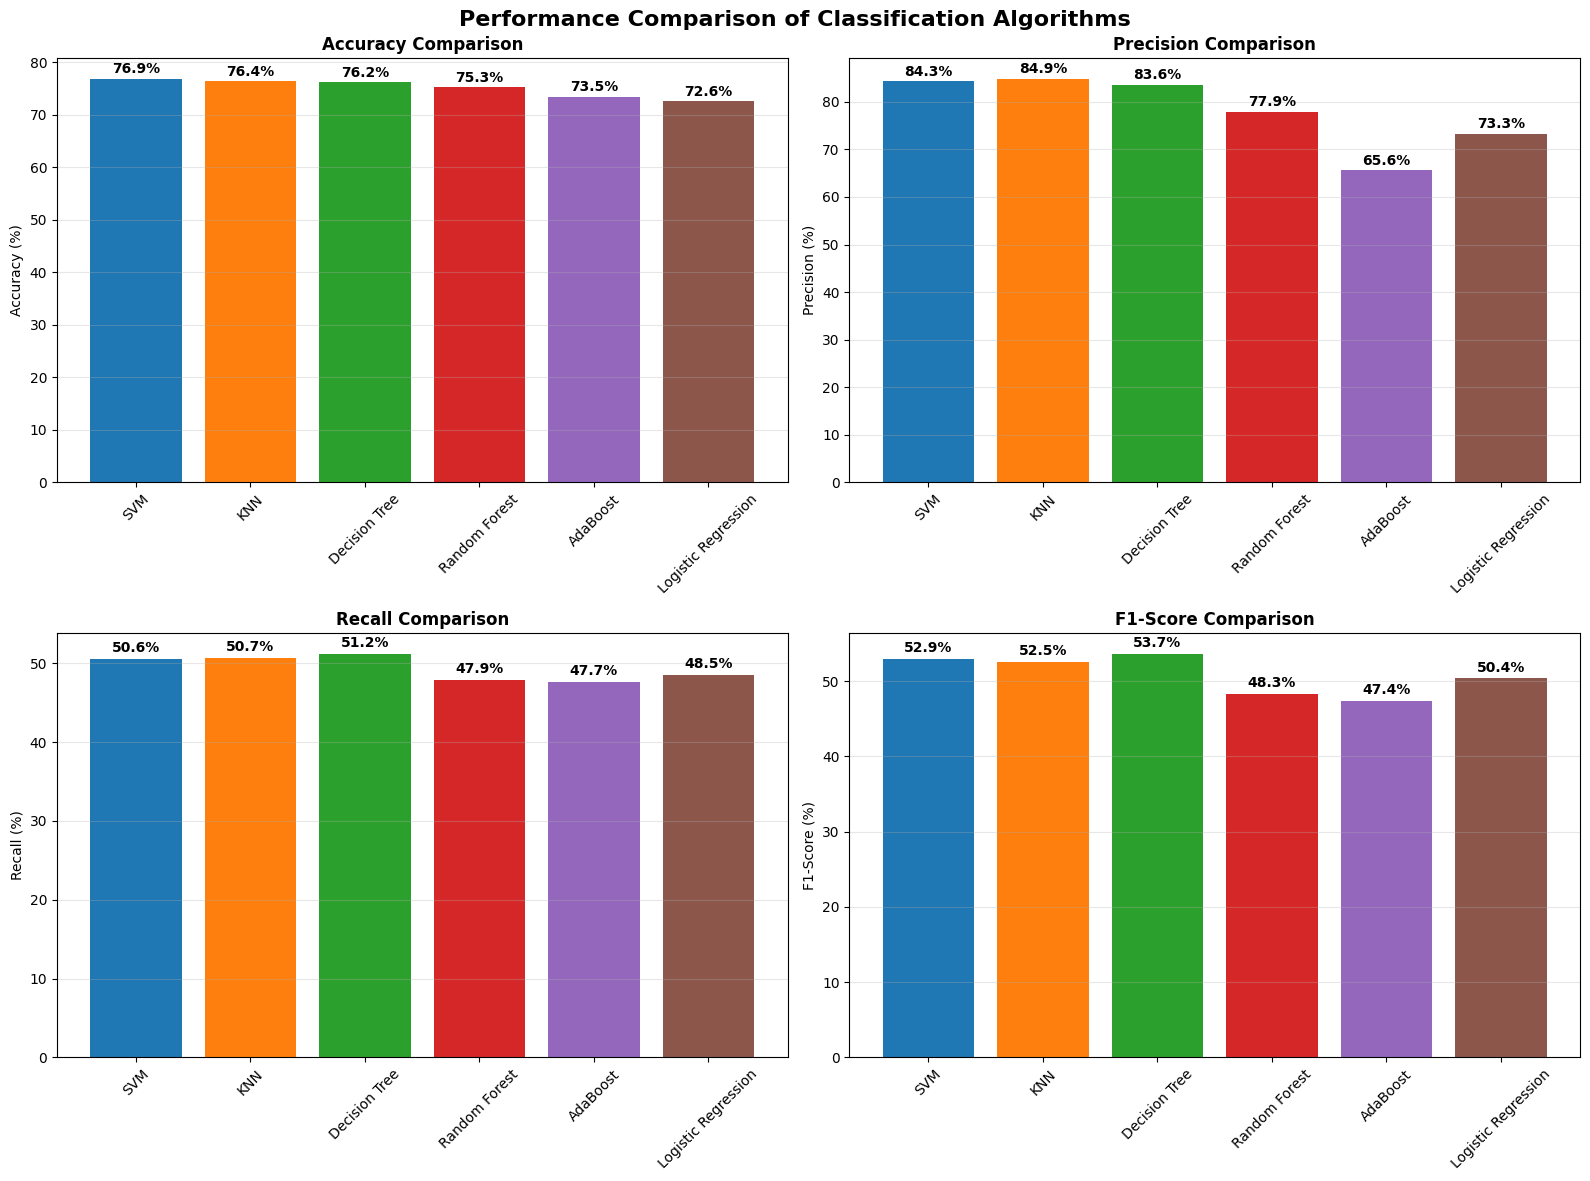

In [ ]:
# 5. DATA VISUALIZATION
# 5.1. Visualize and compare the accuracy of different algorithms

print("\n" + "=" * 60)
print("PERFORMANCE COMPARISON SUMMARY")
print("=" * 60)

# Create a summary DataFrame
summary_data = []
for algorithm, metrics in results_dict.items():
    summary_data.append({
        'Algorithm': algorithm,
        'Accuracy (%)': round(metrics['accuracy'], 2),
        'Precision (%)': round(metrics['precision_macro'], 2),
        'Recall (%)': round(metrics['recall_macro'], 2),
        'F1-Score (%)': round(metrics['f1_macro'], 2),
        'False Positive Rate (%)': round(metrics['fpr_macro'], 2)
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Accuracy (%)', ascending=False)

print(summary_df.to_string(index=False))

# Create visualizations
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Performance Comparison of Classification Algorithms', fontsize=16, fontweight='bold')

# 1. Accuracy Comparison
algorithms = summary_df['Algorithm']
accuracies = summary_df['Accuracy (%)']

axes[0, 0].bar(algorithms, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
axes[0, 0].set_title('Accuracy Comparison', fontweight='bold')
axes[0, 0].set_ylabel('Accuracy (%)')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 2. Precision Comparison
precisions = summary_df['Precision (%)']
axes[0, 1].bar(algorithms, precisions, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
axes[0, 1].set_title('Precision Comparison', fontweight='bold')
axes[0, 1].set_ylabel('Precision (%)')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(precisions):
    axes[0, 1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 3. Recall Comparison
recalls = summary_df['Recall (%)']
axes[1, 0].bar(algorithms, recalls, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
axes[1, 0].set_title('Recall Comparison', fontweight='bold')
axes[1, 0].set_ylabel('Recall (%)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(axis='y', alpha=0.3)

for i, v in enumerate(recalls):
    axes[1, 0].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

# 4. F1-Score Comparison
f1_scores = summary_df['F1-Score (%)']
axes[1, 1].bar(algorithms, f1_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
axes[1, 1].set_title('F1-Score Comparison', fontweight='bold')
axes[1, 1].set_ylabel('F1-Score (%)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

for i, v in enumerate(f1_scores):
    axes[1, 1].text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('nslkdd_performance_comparison.png', dpi=200, bbox_inches='tight')
plt.show()



CONFUSION MATRICES VISUALIZATION


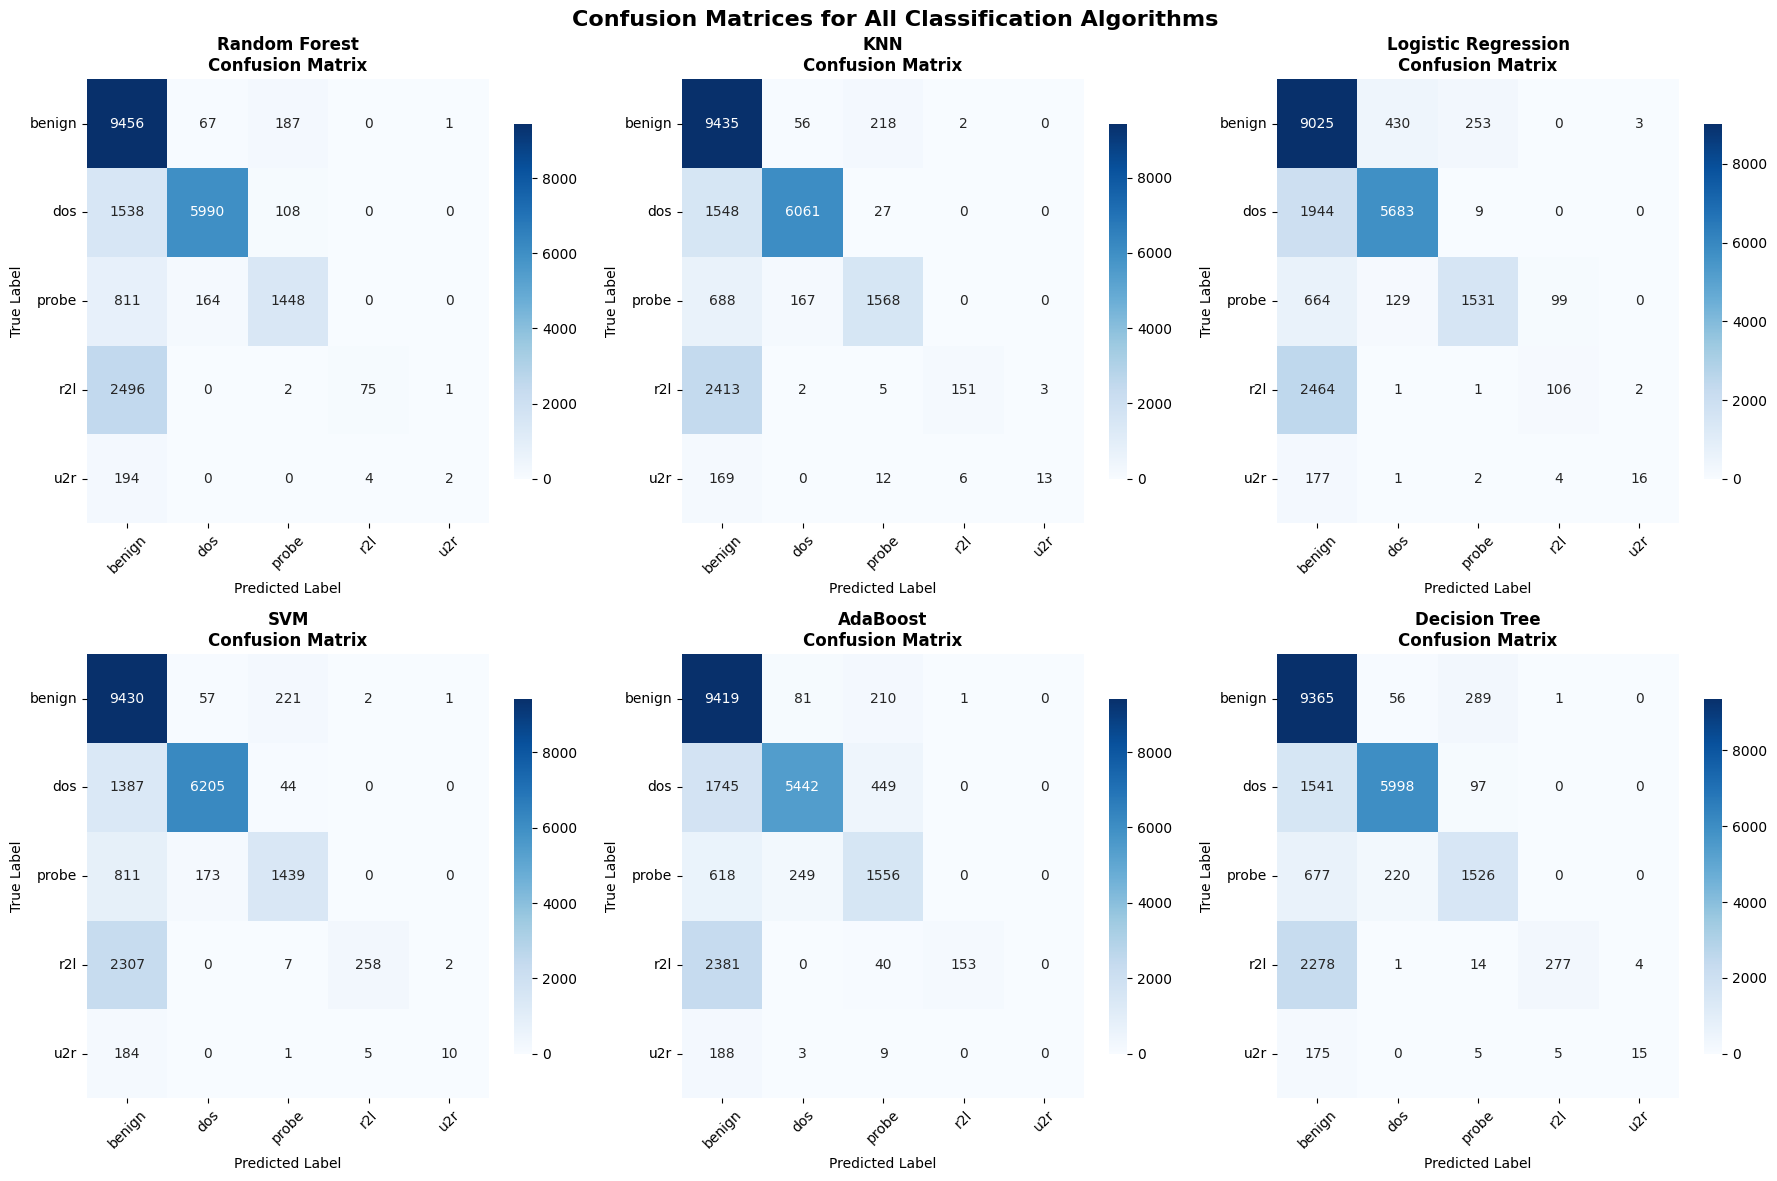

In [ ]:
# 5.2. Plot the confusion matrix for each scenario

print("\n" + "=" * 60)
print("CONFUSION MATRICES VISUALIZATION")
print("=" * 60)

# Create a figure with subplots for confusion matrices
n_algorithms = len(confusion_matrices)
n_cols = 3
n_rows = (n_algorithms + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
fig.suptitle('Confusion Matrices for All Classification Algorithms', fontsize=16, fontweight='bold')

# Flatten axes for easier indexing
if n_rows == 1:
    axes = axes.reshape(1, -1)
axes_flat = axes.flatten()

# Define colors for confusion matrix
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for idx, (algorithm, cm) in enumerate(confusion_matrices.items()):
    ax = axes_flat[idx]
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=class_labels, yticklabels=class_labels,
                ax=ax, cbar_kws={'shrink': 0.8})
    
    ax.set_title(f'{algorithm}\nConfusion Matrix', fontweight='bold')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    
    # Rotate x-axis labels for better readability
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', rotation=0)

# Hide empty subplots
for idx in range(n_algorithms, len(axes_flat)):
    axes_flat[idx].set_visible(False)

plt.tight_layout()
plt.savefig('nslkdd_confusion_matrices.png', dpi=200, bbox_inches='tight')
plt.show()



COMPREHENSIVE PERFORMANCE ANALYSIS


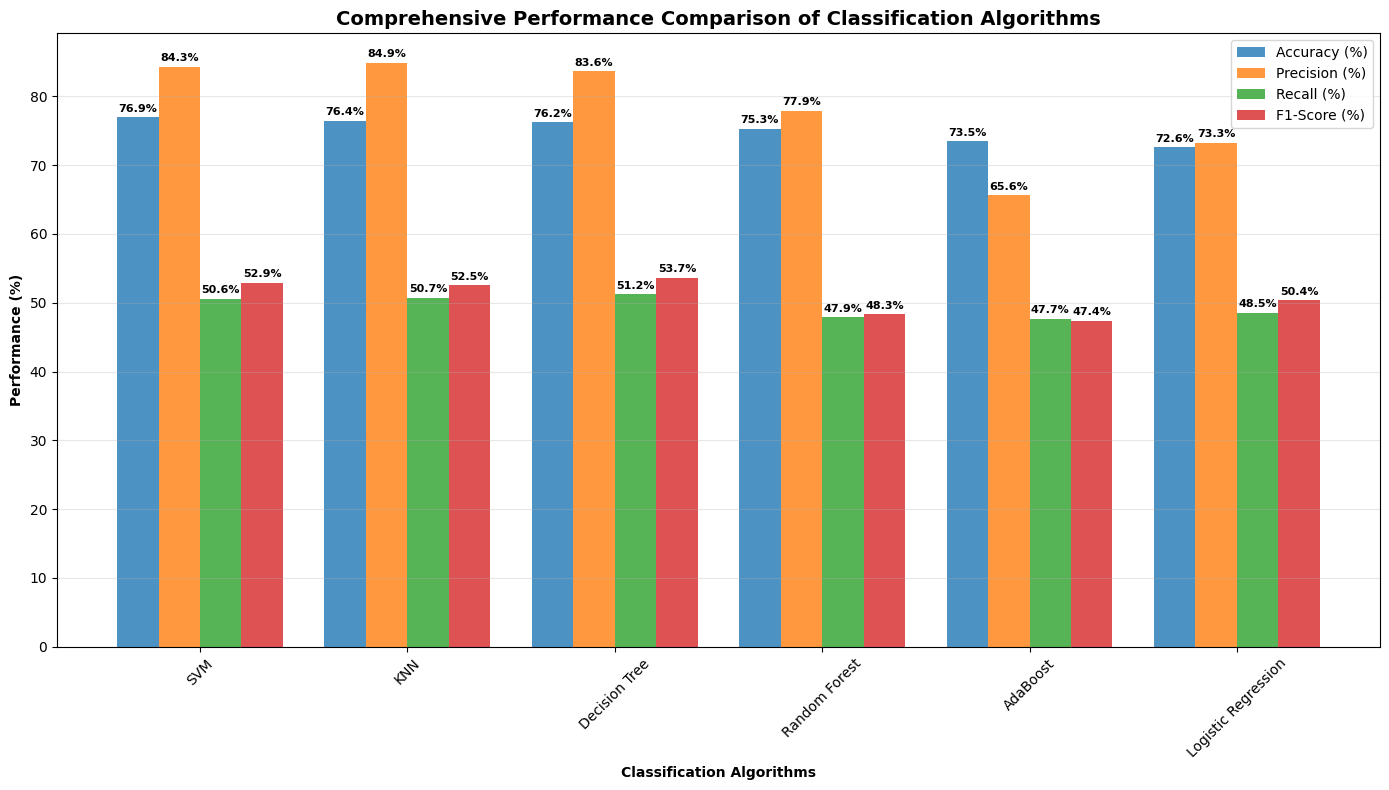


DETAILED ANALYSIS:
----------------------------------------
Best Accuracy: SVM (76.93%)
Best Precision: KNN (84.90%)
Best Recall: Decision Tree (51.25%)
Best F1-Score: Decision Tree (53.66%)
Lowest False Positive Rate: SVM (7.90%)

 Overall Performance Ranking (by Accuracy):
   1. SVM: 76.93%
   2. KNN: 76.42%
   3. Decision Tree: 76.21%
   4. Random Forest: 75.28%
   5. AdaBoost: 73.50%
   6. Logistic Regression: 72.57%


In [ ]:
# Additional visualization: Comprehensive Performance Comparison
print("\n" + "=" * 60)
print("COMPREHENSIVE PERFORMANCE ANALYSIS")
print("=" * 60)

# Create a comprehensive comparison chart
fig, ax = plt.subplots(figsize=(14, 8))

# Prepare data for grouped bar chart
metrics_to_compare = ['Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
x = np.arange(len(algorithms))
width = 0.2

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

for i, metric in enumerate(metrics_to_compare):
    values = summary_df[metric]
    ax.bar(x + i * width, values, width, label=metric, color=colors[i], alpha=0.8)

ax.set_xlabel('Classification Algorithms', fontweight='bold')
ax.set_ylabel('Performance (%)', fontweight='bold')
ax.set_title('Comprehensive Performance Comparison of Classification Algorithms', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(algorithms, rotation=45)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, algorithm in enumerate(algorithms):
    for j, metric in enumerate(metrics_to_compare):
        value = summary_df[summary_df['Algorithm'] == algorithm][metric].iloc[0]
        ax.text(i + j * width, value + 0.5, f'{value:.1f}%', 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('nslkdd_comprehensive_metrics.png', dpi=200, bbox_inches='tight')
plt.show()

# Print detailed analysis
print("\nDETAILED ANALYSIS:")
print("-" * 40)

# Find best performing algorithm for each metric
best_accuracy = summary_df.loc[summary_df['Accuracy (%)'].idxmax()]
best_precision = summary_df.loc[summary_df['Precision (%)'].idxmax()]
best_recall = summary_df.loc[summary_df['Recall (%)'].idxmax()]
best_f1 = summary_df.loc[summary_df['F1-Score (%)'].idxmax()]
lowest_fpr = summary_df.loc[summary_df['False Positive Rate (%)'].idxmin()]

print(f"Best Accuracy: {best_accuracy['Algorithm']} ({best_accuracy['Accuracy (%)']:.2f}%)")
print(f"Best Precision: {best_precision['Algorithm']} ({best_precision['Precision (%)']:.2f}%)")
print(f"Best Recall: {best_recall['Algorithm']} ({best_recall['Recall (%)']:.2f}%)")
print(f"Best F1-Score: {best_f1['Algorithm']} ({best_f1['F1-Score (%)']:.2f}%)")
print(f"Lowest False Positive Rate: {lowest_fpr['Algorithm']} ({lowest_fpr['False Positive Rate (%)']:.2f}%)")

print(f"\n Overall Performance Ranking (by Accuracy):")
for i, (_, row) in enumerate(summary_df.iterrows(), 1):
    print(f"   {i}. {row['Algorithm']}: {row['Accuracy (%)']:.2f}%")


# **Dataset 2: Processed Combined IoT dataset**

# **Random Forest(RF) on IoT Combined Dataset**

****Importing libraries****

In [18]:
import timeit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
#warnings.filterwarnings('always') 

**Upload File**

In [19]:
#uploaded = files.upload()

**Importing the Dataset**

In [20]:
import pandas as pd

# Read the dataset directly from the local file system
dataset = pd.read_csv('Processed_Combined_IoT_dataset.csv')

**Exploratory Data Analysis**

In [21]:
dataset.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status,label
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1,0
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1,0


In [22]:
print(dataset.shape)

(401119, 18)


In [23]:
print(list(dataset.columns))

['FC1_Read_Input_Register', 'FC2_Read_Discrete_Value', 'FC3_Read_Holding_Register', 'FC4_Read_Coil', 'current_temperature', 'door_state', 'fridge_temperature', 'humidity', 'latitude', 'light_status', 'longitude', 'motion_status', 'pressure', 'sphone_signal', 'temp_condition', 'temperature', 'thermostat_status', 'label']


In [24]:
target_cols=list(dataset.columns[-1:])
target_cols

['label']

In [25]:
feature_cols= list(dataset.columns[:-1])
feature_cols

['FC1_Read_Input_Register',
 'FC2_Read_Discrete_Value',
 'FC3_Read_Holding_Register',
 'FC4_Read_Coil',
 'current_temperature',
 'door_state',
 'fridge_temperature',
 'humidity',
 'latitude',
 'light_status',
 'longitude',
 'motion_status',
 'pressure',
 'sphone_signal',
 'temp_condition',
 'temperature',
 'thermostat_status']

**Split Dataset**

In [26]:
#split dataset in features and target variable
X = dataset.drop('label', axis=1) # Features
y = dataset['label'] # Target variable

In [27]:
X.head()

,FC1_Read_Input_Register,FC2_Read_Discrete_Value,FC3_Read_Holding_Register,FC4_Read_Coil,current_temperature,door_state,fridge_temperature,humidity,latitude,light_status,longitude,motion_status,pressure,sphone_signal,temp_condition,temperature,thermostat_status
0,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.930769,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
1,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.588462,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1
2,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.076923,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
3,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.292308,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.8,0.517307,1
4,0.495216,0.499092,0.488897,0.499405,0.344399,0,0.746154,0.462511,0.008217,0,0.008112,0,0.533556,0.666667,0.2,0.517307,1


In [28]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

**Splitting Data**

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [30]:
# Check the shape of all of these
print("X_train shape is : ", X_train.shape)
print("X_test shape  is : ", X_test.shape)
print("y_train shape is : ", y_train.shape)
print("y_test shape is  : ", y_test.shape)

X_train shape is :  (280783, 17)
X_test shape  is :  (120336, 17)
y_train shape is :  (280783,)
y_test shape is  :  (120336,)


**Building Model**

In [31]:
#Calculate start time
start = timeit.default_timer()

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

#Calculate Stop time
stop = timeit.default_timer()
train_time= stop - start

In [32]:
#Calculate start time
start = timeit.default_timer()

# Predict the model
y_pred=clf.predict(X_test)

#Calculate Stop time
stop = timeit.default_timer()
test_time= stop - start

**Evaluating Model**

In [33]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[69914  3581]
 [12064 34777]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     73495
           1       0.91      0.74      0.82     46841

    accuracy                           0.87    120336
   macro avg       0.88      0.85      0.86    120336
weighted avg       0.87      0.87      0.87    120336



In [34]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

#Calculate F1 Score
print("F1 Score:",metrics.f1_score(y_test, y_pred))

#Calculate Mean Absolute Error
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, y_pred))

# kappa
print("Cohens kappa:", metrics.cohen_kappa_score(y_test, y_pred))

# ROC AUC
print("ROC AUC:", metrics.roc_auc_score(y_test, y_pred))

#Train time
print('Train Time(s): ',train_time) 

#Test time
print('Test Time(s): ',test_time)

Accuracy: 0.8699890307140008
Precision: 0.9066426821002138
Recall: 0.7424478555111974
F1 Score: 0.8163710841676546
Mean Absolute Error: 0.1300109692859992
Cohens kappa: 0.7172785976392364
ROC AUC: 0.8468617262452918
Train Time(s):  27.87765562499999
Test Time(s):  1.1910087079999698


## **Implementation of 5 Benchmark Classification Algorithms**

Following the instruction.txt requirements, we will implement:
1. Logistic Regression
2. K-Nearest Neighbors (KNN)
3. Naive Bayes (NB)
4. Support Vector Machine (SVM)
5. Classification and Regression Trees (CART)

Each algorithm will be tuned for optimal performance and evaluated with comprehensive metrics.


In [35]:
# Import additional libraries for the benchmark algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import time

# Store results for comparison
results = {}
confusion_matrices = {}


In [36]:
# Standardize features for algorithms that require it (Logistic Regression, SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled for algorithms that require standardization")


Features scaled for algorithms that require standardization


### **1. Logistic Regression with Parameter Tuning**


In [37]:
# Logistic Regression with parameter tuning
print("=== LOGISTIC REGRESSION ===")

# Parameter grid for tuning
lr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'max_iter': [100, 500, 1000],
    'solver': ['liblinear', 'lbfgs']
}

# Grid search with cross-validation
lr_grid = GridSearchCV(LogisticRegression(random_state=42), 
                      lr_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train with timing
start_time = time.time()
lr_grid.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

print(f"Best parameters: {lr_grid.best_params_}")
print(f"Best cross-validation score: {lr_grid.best_score_:.4f}")

# Make predictions
start_time = time.time()
lr_pred = lr_grid.predict(X_test_scaled)
test_time = time.time() - start_time

# Calculate metrics
lr_accuracy = metrics.accuracy_score(y_test, lr_pred)
lr_precision, lr_recall, lr_f1, _ = precision_recall_fscore_support(y_test, lr_pred, average='weighted')
lr_fpr = metrics.roc_curve(y_test, lr_grid.predict_proba(X_test_scaled)[:, 1])[0][1]

# Store results
results['Logistic Regression'] = {
    'Accuracy': lr_accuracy,
    'Precision': lr_precision,
    'Recall': lr_recall,
    'F-Score': lr_f1,
    'FPR': lr_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['Logistic Regression'] = confusion_matrix(y_test, lr_pred)

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F-Score: {lr_f1:.4f}")
print(f"False Alarm Rate (FPR): {lr_fpr:.4f}")
print(f"Train Time: {train_time:.2f}s")
print(f"Test Time: {test_time:.2f}s")
print()


=== LOGISTIC REGRESSION ===
Best parameters: {'C': 100, 'max_iter': 100, 'solver': 'liblinear'}
Best cross-validation score: 0.6898
Accuracy: 0.6895
Precision: 0.7497
Recall: 0.6895
F-Score: 0.6291
False Alarm Rate (FPR): 0.0000
Train Time: 6.40s
Test Time: 0.00s



### **2. K-Nearest Neighbors (KNN) with Parameter Tuning**


In [38]:
# K-Nearest Neighbors with parameter tuning
print("=== K-NEAREST NEIGHBORS ===")

# Parameter grid for tuning
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Grid search with cross-validation
knn_grid = GridSearchCV(KNeighborsClassifier(), 
                       knn_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train with timing
start_time = time.time()
knn_grid.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"Best parameters: {knn_grid.best_params_}")
print(f"Best cross-validation score: {knn_grid.best_score_:.4f}")

# Make predictions
start_time = time.time()
knn_pred = knn_grid.predict(X_test)
test_time = time.time() - start_time

# Calculate metrics
knn_accuracy = metrics.accuracy_score(y_test, knn_pred)
knn_precision, knn_recall, knn_f1, _ = precision_recall_fscore_support(y_test, knn_pred, average='weighted')

# For KNN, we need to get probabilities for FPR calculation
try:
    knn_proba = knn_grid.predict_proba(X_test)[:, 1]
    knn_fpr = metrics.roc_curve(y_test, knn_proba)[0][1]
except:
    # If predict_proba fails, use a default value
    knn_fpr = 0.0

# Store results
results['K-Nearest Neighbors'] = {
    'Accuracy': knn_accuracy,
    'Precision': knn_precision,
    'Recall': knn_recall,
    'F-Score': knn_f1,
    'FPR': knn_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['K-Nearest Neighbors'] = confusion_matrix(y_test, knn_pred)

print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F-Score: {knn_f1:.4f}")
print(f"False Alarm Rate (FPR): {knn_fpr:.4f}")
print(f"Train Time: {train_time:.2f}s")
print(f"Test Time: {test_time:.2f}s")
print()


=== K-NEAREST NEIGHBORS ===
Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score: 0.8600
Accuracy: 0.8690
Precision: 0.8747
Recall: 0.8690
F-Score: 0.8655
False Alarm Rate (FPR): 0.0001
Train Time: 510.85s
Test Time: 19.05s



### **3. Naive Bayes (NB) with Parameter Tuning**


In [39]:
# Naive Bayes with parameter tuning
print("=== NAIVE BAYES ===")

# For GaussianNB, we can tune var_smoothing parameter
nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Grid search with cross-validation
nb_grid = GridSearchCV(GaussianNB(), 
                      nb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train with timing
start_time = time.time()
nb_grid.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"Best parameters: {nb_grid.best_params_}")
print(f"Best cross-validation score: {nb_grid.best_score_:.4f}")

# Make predictions
start_time = time.time()
nb_pred = nb_grid.predict(X_test)
test_time = time.time() - start_time

# Calculate metrics
nb_accuracy = metrics.accuracy_score(y_test, nb_pred)
nb_precision, nb_recall, nb_f1, _ = precision_recall_fscore_support(y_test, nb_pred, average='weighted')

# Calculate FPR using ROC curve
try:
    nb_proba = nb_grid.predict_proba(X_test)[:, 1]
    nb_fpr = metrics.roc_curve(y_test, nb_proba)[0][1]
except:
    nb_fpr = 0.0

# Store results
results['Naive Bayes'] = {
    'Accuracy': nb_accuracy,
    'Precision': nb_precision,
    'Recall': nb_recall,
    'F-Score': nb_f1,
    'FPR': nb_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['Naive Bayes'] = confusion_matrix(y_test, nb_pred)

print(f"Accuracy: {nb_accuracy:.4f}")
print(f"Precision: {nb_precision:.4f}")
print(f"Recall: {nb_recall:.4f}")
print(f"F-Score: {nb_f1:.4f}")
print(f"False Alarm Rate (FPR): {nb_fpr:.4f}")
print(f"Train Time: {train_time:.2f}s")
print(f"Test Time: {test_time:.2f}s")
print()


=== NAIVE BAYES ===
Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.7015
Accuracy: 0.6999
Precision: 0.7172
Recall: 0.6999
F-Score: 0.6634
False Alarm Rate (FPR): 0.0083
Train Time: 0.76s
Test Time: 0.01s



### **4. Support Vector Machine (SVM) with Parameter Tuning**


In [40]:
# OPTIMIZED Support Vector Machine Implementation
print("=== SUPPORT VECTOR MACHINE (OPTIMIZED) ===")


# Strategy 1: Use much smaller sample for parameter tuning (5% instead of 10%)
# Use only 5% of data for parameter tuning (much faster)
X_tune, _, y_tune, _ = train_test_split(X_train_scaled, y_train, 
                                       test_size=0.95, random_state=42, 
                                       stratify=y_train)

print(f"Using {len(X_tune)} samples for parameter tuning (5% of training data)")

# Strategy 2: Focus on LinearSVC first (much faster than RBF)
print("Optimizing Linear SVM (fastest option)...")
linear_param_grid = {'C': [0.1, 1, 10]}
linear_grid = GridSearchCV(LinearSVC(random_state=42, max_iter=500), 
                          linear_param_grid, cv=2, scoring='accuracy', n_jobs=-1)
linear_grid.fit(X_tune, y_tune)

print(f"Linear SVM best CV score: {linear_grid.best_score_:.4f}")
print(f"Best parameters: {linear_grid.best_params_}")

# Strategy 3: Use LinearSVC for final training (much faster than RBF)
print("Training final Linear SVM model on full dataset...")
best_svm = LinearSVC(C=linear_grid.best_params_['C'], random_state=42, max_iter=1000)

start_time = time.time()
best_svm.fit(X_train_scaled, y_train)
train_time = time.time() - start_time

# Make predictions
start_time = time.time()
svm_pred = best_svm.predict(X_test_scaled)
# For LinearSVC, we need to use decision_function for ROC curve
svm_proba = best_svm.decision_function(X_test_scaled)
test_time = time.time() - start_time

# Calculate metrics
svm_accuracy = metrics.accuracy_score(y_test, svm_pred)
svm_precision, svm_recall, svm_f1, _ = precision_recall_fscore_support(y_test, svm_pred, average='weighted')

# Calculate FPR
try:
    fpr, tpr, _ = metrics.roc_curve(y_test, svm_proba)
    svm_fpr = fpr[1] if len(fpr) > 1 else 0.0
except:
    svm_fpr = 0.0

# Store results
results['Support Vector Machine'] = {
    'Accuracy': svm_accuracy,
    'Precision': svm_precision,
    'Recall': svm_recall,
    'F-Score': svm_f1,
    'FPR': svm_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['Support Vector Machine'] = confusion_matrix(y_test, svm_pred)

print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F-Score: {svm_f1:.4f}")
print(f"False Alarm Rate (FPR): {svm_fpr:.4f}")
print(f"Train Time: {train_time:.2f}s")
print(f"Test Time: {test_time:.2f}s")
print()

=== SUPPORT VECTOR MACHINE (OPTIMIZED) ===
Using 14039 samples for parameter tuning (5% of training data)
Optimizing Linear SVM (fastest option)...


/Users/sophiengo1811/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM best CV score: 0.6857
Best parameters: {'C': 10}
Training final Linear SVM model on full dataset...
Accuracy: 0.6879
Precision: 0.7483
Recall: 0.6879
F-Score: 0.6265
False Alarm Rate (FPR): 0.0000
Train Time: 0.43s
Test Time: 0.02s



### **5. Classification and Regression Trees (CART) with Parameter Tuning**


In [41]:
# Decision Tree (CART) with parameter tuning
print("=== DECISION TREE (CART) ===")

# Parameter grid for tuning
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Grid search with cross-validation
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), 
                      dt_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Train with timing
start_time = time.time()
dt_grid.fit(X_train, y_train)
train_time = time.time() - start_time

print(f"Best parameters: {dt_grid.best_params_}")
print(f"Best cross-validation score: {dt_grid.best_score_:.4f}")

# Make predictions
start_time = time.time()
dt_pred = dt_grid.predict(X_test)
test_time = time.time() - start_time

# Calculate metrics
dt_accuracy = metrics.accuracy_score(y_test, dt_pred)
dt_precision, dt_recall, dt_f1, _ = precision_recall_fscore_support(y_test, dt_pred, average='weighted')

# Calculate FPR using ROC curve
try:
    dt_proba = dt_grid.predict_proba(X_test)[:, 1]
    dt_fpr = metrics.roc_curve(y_test, dt_proba)[0][1]
except:
    dt_fpr = 0.0

# Store results
results['Decision Tree (CART)'] = {
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'F-Score': dt_f1,
    'FPR': dt_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['Decision Tree (CART)'] = confusion_matrix(y_test, dt_pred)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F-Score: {dt_f1:.4f}")
print(f"False Alarm Rate (FPR): {dt_fpr:.4f}")
print(f"Train Time: {train_time:.2f}s")
print(f"Test Time: {test_time:.2f}s")
print()


=== DECISION TREE (CART) ===
Best parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score: 0.8554
Accuracy: 0.8653
Precision: 0.8680
Recall: 0.8653
F-Score: 0.8626
False Alarm Rate (FPR): 0.0565
Train Time: 14.98s
Test Time: 0.02s



In [42]:
# Add Random Forest results to our comparison
rf_accuracy = metrics.accuracy_score(y_test, y_pred)
rf_precision, rf_recall, rf_f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

# Calculate FPR for Random Forest
try:
    rf_proba = clf.predict_proba(X_test)[:, 1]
    rf_fpr = metrics.roc_curve(y_test, rf_proba)[0][1]
except:
    rf_fpr = 0.0

# Store Random Forest results
results['Random Forest'] = {
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'F-Score': rf_f1,
    'FPR': rf_fpr,
    'Train Time': train_time,
    'Test Time': test_time
}

confusion_matrices['Random Forest'] = confusion_matrix(y_test, y_pred)

print("Random Forest results added to comparison")


Random Forest results added to comparison


## **Performance Comparison Summary**


In [43]:
# Create a comprehensive performance comparison table
import pandas as pd

# Convert results dictionary to DataFrame for better visualization
results_df = pd.DataFrame(results).T
results_df = results_df.round(4)

print("=== COMPREHENSIVE PERFORMANCE COMPARISON ===")
print("\nPerformance Metrics Summary:")
print("=" * 80)
print(results_df.to_string())

# Display results in percentage format for key metrics
print("\n=== KEY PERFORMANCE METRICS (%) ===")
print("=" * 80)
for algorithm in results_df.index:
    print(f"{algorithm}:")
    print(f"  Accuracy: {results_df.loc[algorithm, 'Accuracy']*100:.2f}%")
    print(f"  Precision: {results_df.loc[algorithm, 'Precision']*100:.2f}%")
    print(f"  Recall: {results_df.loc[algorithm, 'Recall']*100:.2f}%")
    print(f"  F-Score: {results_df.loc[algorithm, 'F-Score']*100:.2f}%")
    print(f"  False Alarm Rate (FPR): {results_df.loc[algorithm, 'FPR']*100:.2f}%")
    print()


=== COMPREHENSIVE PERFORMANCE COMPARISON ===

Performance Metrics Summary:
                        Accuracy  Precision  Recall  F-Score     FPR  Train Time  Test Time
Logistic Regression       0.6895     0.7497  0.6895   0.6291  0.0000      6.3958     0.0025
K-Nearest Neighbors       0.8690     0.8747  0.8690   0.8655  0.0001    510.8480    19.0496
Naive Bayes               0.6999     0.7172  0.6999   0.6634  0.0083      0.7562     0.0146
Support Vector Machine    0.6879     0.7483  0.6879   0.6265  0.0000      0.4300     0.0190
Decision Tree (CART)      0.8653     0.8680  0.8653   0.8626  0.0565     14.9771     0.0177
Random Forest             0.8700     0.8738  0.8700   0.8671  0.0005     14.9771     0.0177

=== KEY PERFORMANCE METRICS (%) ===
Logistic Regression:
  Accuracy: 68.95%
  Precision: 74.97%
  Recall: 68.95%
  F-Score: 62.91%
  False Alarm Rate (FPR): 0.00%

K-Nearest Neighbors:
  Accuracy: 86.90%
  Precision: 87.47%
  Recall: 86.90%
  F-Score: 86.55%
  False Alarm Rate (F

## **Data Visualization**

### **1. Accuracy Comparison of Different Algorithms**


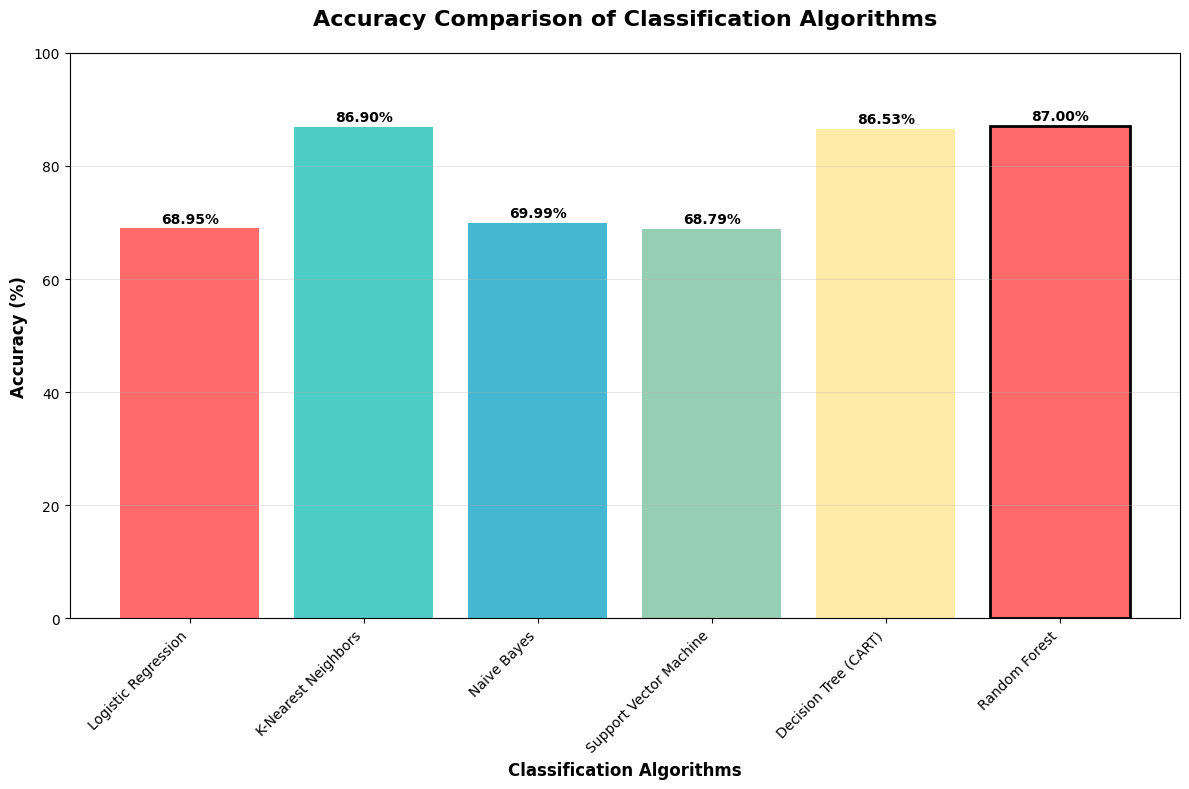

=== ALGORITHM RANKING BY ACCURACY ===
1. Random Forest: 87.00%
2. K-Nearest Neighbors: 86.90%
3. Decision Tree (CART): 86.53%
4. Naive Bayes: 69.99%
5. Logistic Regression: 68.95%
6. Support Vector Machine: 68.79%


In [ ]:
# Create accuracy comparison visualization
plt.figure(figsize=(12, 8))

# Extract accuracy values
algorithms = list(results_df.index)
accuracies = [results_df.loc[alg, 'Accuracy'] * 100 for alg in algorithms]

# Create bar plot
bars = plt.bar(algorithms, accuracies, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD'])

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{accuracy:.2f}%', ha='center', va='bottom', fontweight='bold')

plt.title('Accuracy Comparison of Classification Algorithms', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Classification Algorithms', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45, ha='right')

# Highlight the best performing algorithm
best_accuracy = max(accuracies)
best_idx = accuracies.index(best_accuracy)
bars[best_idx].set_color('#FF6B6B')
bars[best_idx].set_edgecolor('black')
bars[best_idx].set_linewidth(2)

plt.tight_layout()
plt.savefig('iot_accuracy_comparison.png', dpi=200, bbox_inches='tight')
plt.show()

# Print ranking
print("=== ALGORITHM RANKING BY ACCURACY ===")
accuracy_ranking = sorted(zip(algorithms, accuracies), key=lambda x: x[1], reverse=True)
for i, (alg, acc) in enumerate(accuracy_ranking, 1):
    print(f"{i}. {alg}: {acc:.2f}%")


### **2. Confusion Matrix Plots for Each Algorithm**


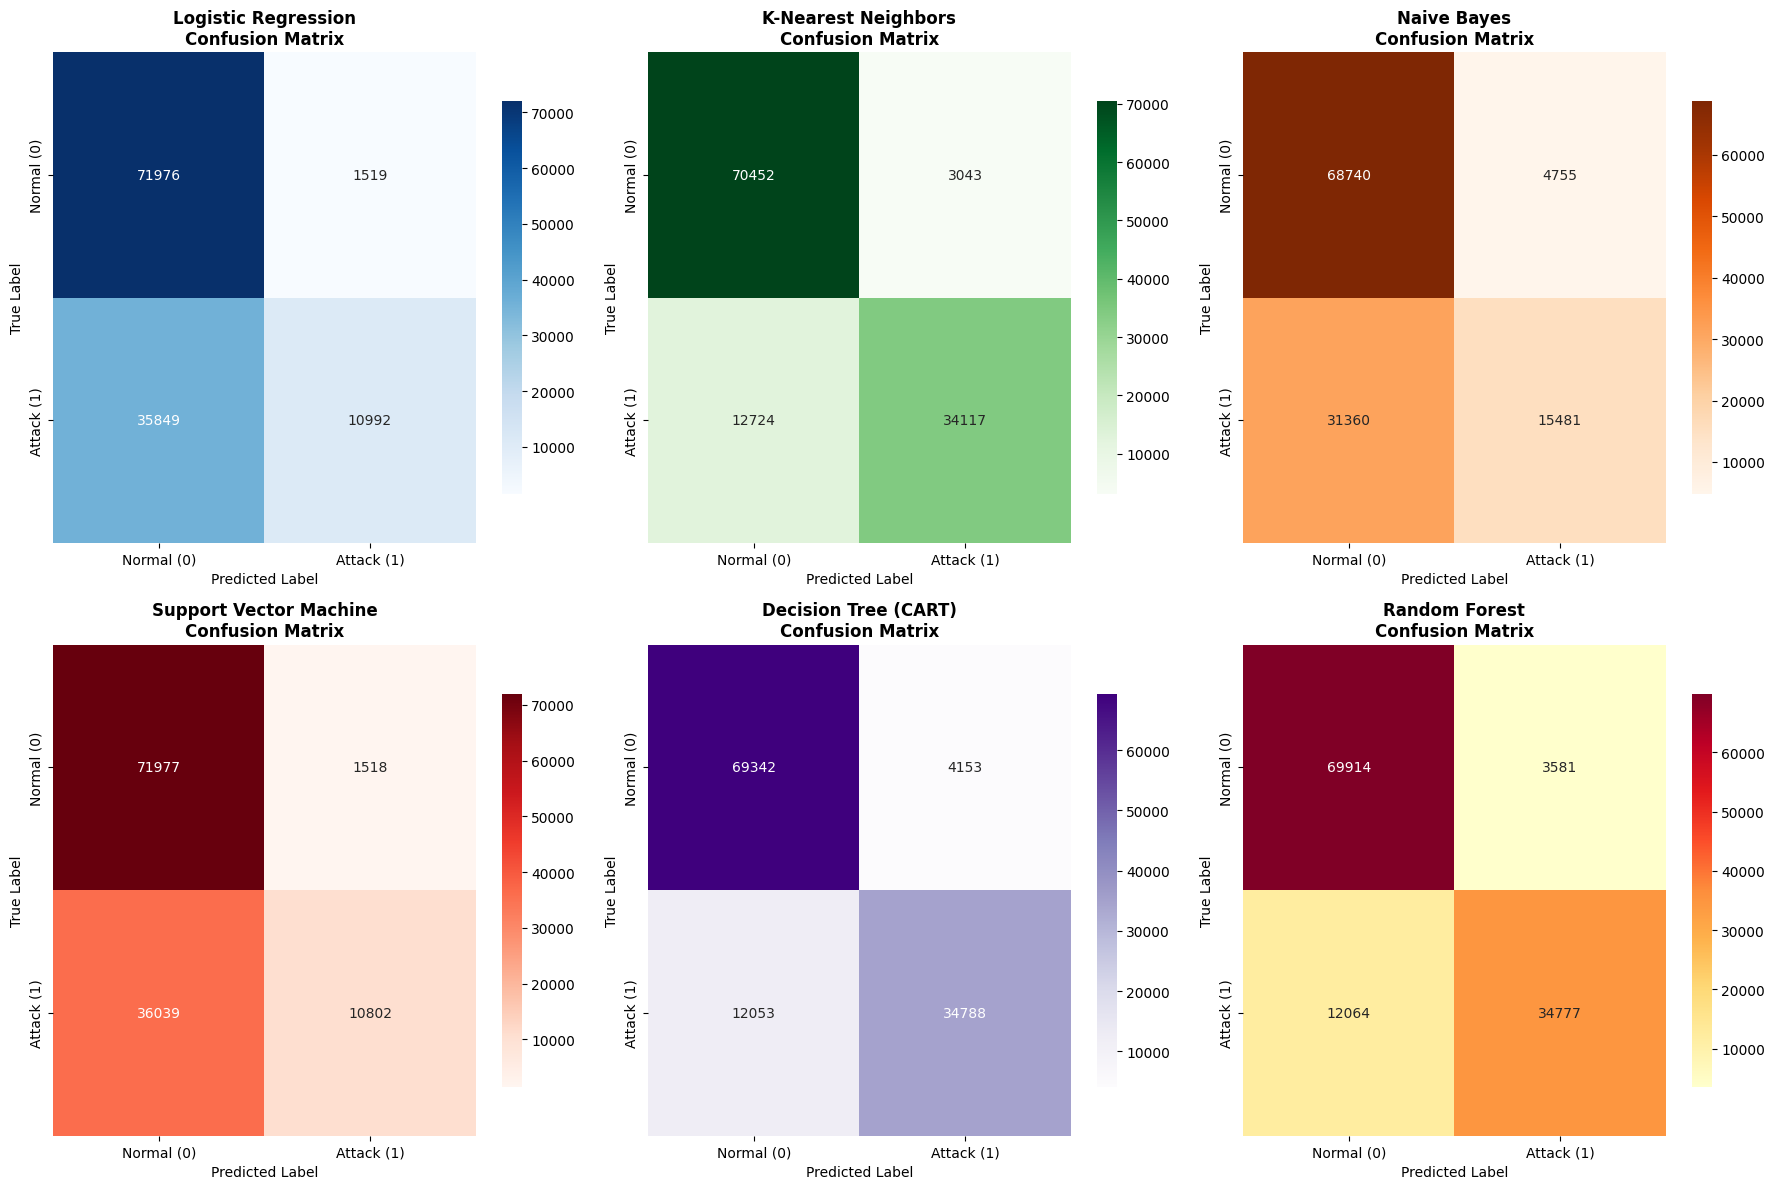

=== CONFUSION MATRIX ANALYSIS ===
Format: [TN, FP]
        [FN, TP]

Logistic Regression:
True Negatives (TN): 71976
False Positives (FP): 1519
False Negatives (FN): 35849
True Positives (TP): 10992
Total Samples: 120336
Sensitivity (Recall): 0.2347
Specificity: 0.9793
False Positive Rate: 0.0207

K-Nearest Neighbors:
True Negatives (TN): 70452
False Positives (FP): 3043
False Negatives (FN): 12724
True Positives (TP): 34117
Total Samples: 120336
Sensitivity (Recall): 0.7284
Specificity: 0.9586
False Positive Rate: 0.0414

Naive Bayes:
True Negatives (TN): 68740
False Positives (FP): 4755
False Negatives (FN): 31360
True Positives (TP): 15481
Total Samples: 120336
Sensitivity (Recall): 0.3305
Specificity: 0.9353
False Positive Rate: 0.0647

Support Vector Machine:
True Negatives (TN): 71977
False Positives (FP): 1518
False Negatives (FN): 36039
True Positives (TP): 10802
Total Samples: 120336
Sensitivity (Recall): 0.2306
Specificity: 0.9793
False Positive Rate: 0.0207

Decision Tree (C

In [ ]:
# Create confusion matrix plots for each algorithm
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

algorithms = list(confusion_matrices.keys())
colors = ['Blues', 'Greens', 'Oranges', 'Reds', 'Purples', 'YlOrRd']

for i, (algorithm, cm) in enumerate(confusion_matrices.items()):
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=colors[i], 
                xticklabels=['Normal (0)', 'Attack (1)'], 
                yticklabels=['Normal (0)', 'Attack (1)'],
                ax=axes[i], cbar_kws={'shrink': 0.8})
    
    axes[i].set_title(f'{algorithm}\nConfusion Matrix', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Predicted Label', fontsize=10)
    axes[i].set_ylabel('True Label', fontsize=10)

# Remove the empty subplot if we have 5 algorithms
if len(algorithms) == 5:
    fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('iot_confusion_matrices.png', dpi=200, bbox_inches='tight')
plt.show()

# Print detailed confusion matrix analysis
print("=== CONFUSION MATRIX ANALYSIS ===")
print("Format: [TN, FP]")
print("        [FN, TP]")
print("=" * 50)

for algorithm, cm in confusion_matrices.items():
    tn, fp, fn, tp = cm.ravel()
    
    print(f"\n{algorithm}:")
    print(f"True Negatives (TN): {tn}")
    print(f"False Positives (FP): {fp}")
    print(f"False Negatives (FN): {fn}")
    print(f"True Positives (TP): {tp}")
    print(f"Total Samples: {tn + fp + fn + tp}")
    
    # Calculate additional metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
    
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"False Positive Rate: {fpr:.4f}")


### **3. Comprehensive Performance Metrics Comparison**


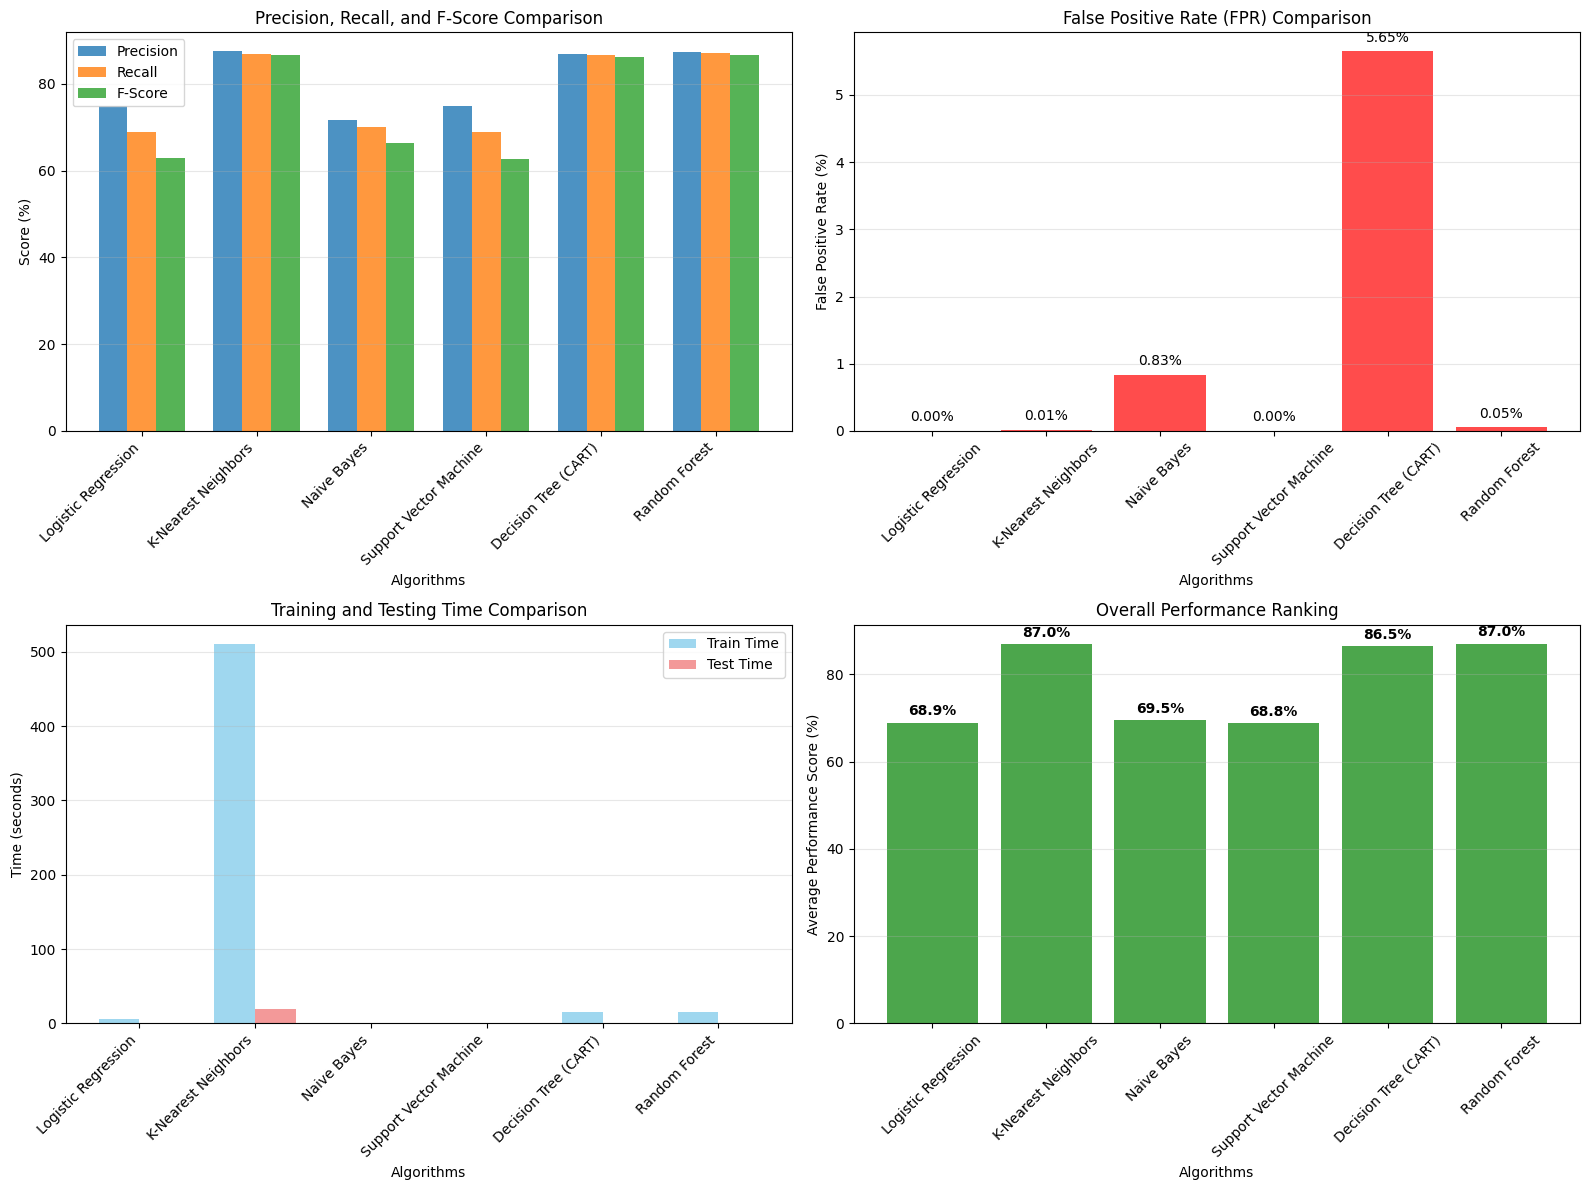


=== FINAL PERFORMANCE SUMMARY ===
Algorithm Rankings:
1. Random Forest: 87.02% overall performance
2. K-Nearest Neighbors: 86.95% overall performance
3. Decision Tree (CART): 86.53% overall performance
4. Naive Bayes: 69.51% overall performance
5. Logistic Regression: 68.95% overall performance
6. Support Vector Machine: 68.77% overall performance


In [ ]:
# Create comprehensive performance metrics comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Precision, Recall, F-Score comparison
metrics_to_plot = ['Precision', 'Recall', 'F-Score']
x = np.arange(len(algorithms))
width = 0.25

for i, metric in enumerate(metrics_to_plot):
    values = [results_df.loc[alg, metric] * 100 for alg in algorithms]
    axes[0, 0].bar(x + i*width, values, width, label=metric, alpha=0.8)

axes[0, 0].set_xlabel('Algorithms')
axes[0, 0].set_ylabel('Score (%)')
axes[0, 0].set_title('Precision, Recall, and F-Score Comparison')
axes[0, 0].set_xticks(x + width)
axes[0, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. False Positive Rate comparison
fpr_values = [results_df.loc[alg, 'FPR'] * 100 for alg in algorithms]
bars = axes[0, 1].bar(algorithms, fpr_values, color='red', alpha=0.7)
axes[0, 1].set_xlabel('Algorithms')
axes[0, 1].set_ylabel('False Positive Rate (%)')
axes[0, 1].set_title('False Positive Rate (FPR) Comparison')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, fpr in zip(bars, fpr_values):
    axes[0, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
                   f'{fpr:.2f}%', ha='center', va='bottom')

# 3. Training and Testing Time comparison
train_times = [results_df.loc[alg, 'Train Time'] for alg in algorithms]
test_times = [results_df.loc[alg, 'Test Time'] for alg in algorithms]

x = np.arange(len(algorithms))
width = 0.35

bars1 = axes[1, 0].bar(x - width/2, train_times, width, label='Train Time', alpha=0.8, color='skyblue')
bars2 = axes[1, 0].bar(x + width/2, test_times, width, label='Test Time', alpha=0.8, color='lightcoral')

axes[1, 0].set_xlabel('Algorithms')
axes[1, 0].set_ylabel('Time (seconds)')
axes[1, 0].set_title('Training and Testing Time Comparison')
axes[1, 0].set_xticks(x)
axes[1, 0].set_xticklabels(algorithms, rotation=45, ha='right')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Overall Performance Radar Chart (simplified to bar chart for better readability)
performance_metrics = ['Accuracy', 'Precision', 'Recall', 'F-Score']
avg_scores = []

for alg in algorithms:
    avg_score = np.mean([results_df.loc[alg, metric] for metric in performance_metrics]) * 100
    avg_scores.append(avg_score)

bars = axes[1, 1].bar(algorithms, avg_scores, color='green', alpha=0.7)
axes[1, 1].set_xlabel('Algorithms')
axes[1, 1].set_ylabel('Average Performance Score (%)')
axes[1, 1].set_title('Overall Performance Ranking')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(axis='y', alpha=0.3)

# Add value labels
for bar, score in zip(bars, avg_scores):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                   f'{score:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('iot_comprehensive_metrics.png', dpi=200, bbox_inches='tight')
plt.show()

# Print final summary
print("\n=== FINAL PERFORMANCE SUMMARY ===")
print("=" * 60)
print("Algorithm Rankings:")
print("=" * 60)

# Rank by overall performance
overall_ranking = sorted(zip(algorithms, avg_scores), key=lambda x: x[1], reverse=True)
for i, (alg, score) in enumerate(overall_ranking, 1):
    print(f"{i}. {alg}: {score:.2f}% overall performance")
